In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 2
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.4
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[2_10_51_300_0.4_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[2_10_51_300_0.4_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	127243.6535

Best Fitness:	27754.6146
Solution:	200.0000
Diff:		27554.6146

[0:05:14][----------] 1.96% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	201992.5134

Best Fitness:	56767.7372
Solution:	200.0000
Diff:		56567.7372

[0:09:52][----------] 3.92% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	204251.7389

Best Fitness:	67586.2815
Solution:	200.0000
Diff:		67386.2815

[0:14:20][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	157343.1399

Best Fitness:	43584.2871
Solution:	200.0000
Diff:		43384.2871

[0:18:26][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	219593.1412

Best Fitness:	36494.1673
Solution:	200.0000
Diff:		36294.1673

[0:22:42][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	156831.3677

Best Fitness:	22496.8274
Solution:	200.0000
Diff:		22296.8274

[0:27:10][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	142870.0612

Best Fitness:	30868.1412
Solution:	200.0000
Diff:		30668.1412

[0:31:39][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	85073.7830

Best Fitness:	10727.3322
Solution:	200.0000
Diff:		10527.3322

[0:35:58][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	113653.8485

Best Fitness:	31050.5549
Solution:	200.0000
Diff:		30850.5549

[0:39:53][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	198773.2968

Best Fitness:	79257.9525
Solution:	200.0000
Diff:		79057.9525

[0:43:57][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	157137.4485

Best Fitness:	38158.3606
Solution:	200.0000
Diff:		37958.3606

[0:48:07][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	112229.5832

Best Fitness:	19833.9096
Solution:	200.0000
Diff:		19633.9096

[0:52:09][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	149018.8163

Best Fitness:	34413.8626
Solution:	200.0000
Diff:		34213.8626

[0:56:00][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	175632.8021

Best Fitness:	48217.5951
Solution:	200.0000
Diff:		48017.5951

[1:00:02][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	76876.9718

Best Fitness:	5436.8254
Solution:	200.0000
Diff:		5236.8254

[1:04:09][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	147369.8336

Best Fitness:	39218.1871
Solution:	200.0000
Diff:		39018.1871

[1:08:02][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	152890.6974

Best Fitness:	30262.5035
Solution:	200.0000
Diff:		30062.5035

[1:12:01][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	153015.1213

Best Fitness:	31499.6552
Solution:	200.0000
Diff:		31299.6552

[1:16:00][####------] 35.29% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	194236.1865

Best Fitness:	32769.8410
Solution:	200.0000
Diff:		32569.8410

[1:19:49][####------] 37.25% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	220509.2552

Best Fitness:	51872.7553
Solution:	200.0000
Diff:		51672.7553

[1:23:50][####------] 39.22% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	99060.6463

Best Fitness:	32438.9300
Solution:	200.0000
Diff:		32238.9300

[1:27:44][####------] 41.18% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	108783.2059

Best Fitness:	34191.4178
Solution:	200.0000
Diff:		33991.4178

[1:31:48][####------] 43.14% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	112385.3081

Best Fitness:	32451.7498
Solution:	200.0000
Diff:		32251.7498

[1:35:31][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	68689.6675

Best Fitness:	15553.4289
Solution:	200.0000
Diff:		15353.4289

[1:39:09][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	129474.2286

Best Fitness:	29142.4904
Solution:	200.0000
Diff:		28942.4904

[1:42:53][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	106416.0211

Best Fitness:	32758.8250
Solution:	200.0000
Diff:		32558.8250

[1:46:26][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	255111.8095

Best Fitness:	44376.4250
Solution:	200.0000
Diff:		44176.4250

[1:50:17][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	140404.7920

Best Fitness:	22692.1219
Solution:	200.0000
Diff:		22492.1219

[1:54:00][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	140201.3713

Best Fitness:	24364.5770
Solution:	200.0000
Diff:		24164.5770

[1:57:43][######----] 56.86% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	112808.0009

Best Fitness:	30381.6136
Solution:	200.0000
Diff:		30181.6136

[2:01:29][######----] 58.82% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	64302.4969

Best Fitness:	13662.9844
Solution:	200.0000
Diff:		13462.9844

[2:05:10][######----] 60.78% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	93591.2464

Best Fitness:	16273.0197
Solution:	200.0000
Diff:		16073.0197

[2:08:58][######----] 62.75% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	103125.2846

Best Fitness:	14137.4990
Solution:	200.0000
Diff:		13937.4990

[2:12:39][######----] 64.71% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	104625.6809

Best Fitness:	29374.2323
Solution:	200.0000
Diff:		29174.2323

[2:16:27][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	122525.7241

Best Fitness:	22731.4396
Solution:	200.0000
Diff:		22531.4396

[2:20:27][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	160914.1481

Best Fitness:	43267.2456
Solution:	200.0000
Diff:		43067.2456

[2:24:14][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	92463.9653

Best Fitness:	18803.9602
Solution:	200.0000
Diff:		18603.9602

[2:28:07][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	216327.9968

Best Fitness:	61501.9389
Solution:	200.0000
Diff:		61301.9389

[2:31:51][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	148849.0656

Best Fitness:	29916.3923
Solution:	200.0000
Diff:		29716.3923

[2:35:14][########--] 76.47% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	203085.6897

Best Fitness:	47711.6405
Solution:	200.0000
Diff:		47511.6405

[2:38:28][########--] 78.43% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	232799.5965

Best Fitness:	59166.8775
Solution:	200.0000
Diff:		58966.8775

[2:41:42][########--] 80.39% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	268046.5483

Best Fitness:	57803.1913
Solution:	200.0000
Diff:		57603.1913

[2:45:10][########--] 82.35% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	121455.5387

Best Fitness:	26859.3476
Solution:	200.0000
Diff:		26659.3476

[2:48:30][########--] 84.31% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	147431.3678

Best Fitness:	22209.9423
Solution:	200.0000
Diff:		22009.9423

[2:51:45][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	141547.3980

Best Fitness:	29467.6911
Solution:	200.0000
Diff:		29267.6911

[2:54:55][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	307897.4677

Best Fitness:	71470.2120
Solution:	200.0000
Diff:		71270.2120

[2:58:14][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	118844.3220

Best Fitness:	23658.1758
Solution:	200.0000
Diff:		23458.1758

[3:01:22][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	149266.5189

Best Fitness:	25717.0316
Solution:	200.0000
Diff:		25517.0316

[3:04:32][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	55253.9200

Best Fitness:	10649.5199
Solution:	200.0000
Diff:		10449.5199

[3:07:57][##########] 96.08% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	338025.6365

Best Fitness:	70025.8424
Solution:	200.0000
Diff:		69825.8424

[3:11:16][##########] 98.04% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	170474.2775

Best Fitness:	39688.3552
Solution:	200.0000
Diff:		39488.3552

[3:14:46][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

3:14:46

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
126,223215.113186,341542.185562,342490.969331,328883.244206,275217.338052,272632.314282,362953.906015,215878.833331,428236.434594,215692.309794,...,310199.800705,275491.011702,136086.924404,221643.557416,175976.025132,167515.951399,304658.3521,270825.885386,290682.922121,50
127,223215.113186,341542.185562,342490.969331,328883.244206,226619.365722,272632.314282,362953.906015,215878.833331,393174.093093,215692.309794,...,287971.378833,275491.011702,136086.924404,170717.481161,175976.025132,167515.951399,304658.3521,270825.885386,290682.922121,50
128,189346.635484,233930.981609,167296.374103,328883.244206,226619.365722,200757.825742,312386.135696,215878.833331,197962.580378,215692.309794,...,208071.660677,275491.011702,136086.924404,170717.481161,175976.025132,167515.951399,304658.3521,270825.885386,290682.922121,50
129,189346.635484,233930.981609,129383.651311,239489.410845,226619.365722,98518.427432,211088.673296,215878.833331,197962.580378,185874.369884,...,208071.660677,275491.011702,136086.924404,170717.481161,175976.025132,167515.951399,304658.3521,270825.885386,290682.922121,50
130,189346.635484,215583.280595,129383.651311,239489.410845,193292.963677,98518.427432,211088.673296,215878.833331,197962.580378,185874.369884,...,142542.483395,275491.011702,136086.924404,170717.481161,175976.025132,167515.951399,304658.3521,270825.885386,83807.181019,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 27554.614610951445

Best error for run 1: 56567.73718037353

Best error for run 2: 67386.2815323212

Best error for run 3: 43384.28711976469

Best error for run 4: 36294.16733162718

Best error for run 5: 22296.82736722996

Best error for run 6: 30668.14115923037

Best error for run 7: 10527.332153125084

Best error for run 8: 30850.554881774253

Best error for run 9: 79057.9525357119

Best error for run 10: 37958.36056438729

Best error for run 11: 19633.909616682682

Best error for run 12: 34213.86260814548

Best error for run 13: 48017.59512727074

Best error for run 14: 5236.82536031949

Best error for run 15: 39018.18705080254

Best error for run 16: 30062.50346104413

Best error for run 17: 31299.655198769167

Best error for run 18: 32569.841041256135

Best error for run 19: 51672.75530595551

Best error for run 20: 32238.93000000186

Best error for run 21: 33991.417754247894

Best error for run 22: 32251.74983937409

Best error for run 23: 15353.428901562955

Best error for run 24: 28942.49038534329

Best error for run 25: 32558.82503262558

Best error for run 26: 44176.42502502426

Best error for run 27: 22492.121854374964

Best error for run 28: 24164.577049531945

Best error for run 29: 30181.613604691058

Best error for run 30: 13462.984442613284

Best error for run 31: 16073.019718142938

Best error for run 32: 13937.498957874395

Best error for run 33: 29174.232259701752

Best error for run 34: 22531.439557095153

Best error for run 35: 43067.24559271618

Best error for run 36: 18603.960174523218

Best error for run 37: 61301.93888176902

Best error for run 38: 29716.39226496879

Best error for run 39: 47511.64049438145

Best error for run 40: 58966.877493353364

Best error for run 41: 57603.191279206236

Best error for run 42: 26659.347621045992

Best error for run 43: 22009.94229656673

Best error for run 44: 29267.691108818133

Best error for run 45: 71270.21204759531

Best error for run 46: 23458.175818072246

Best error for run 47: 25517.031615143096

Best error for run 48: 10449.519924914708

Best error for run 49: 69825.84237774248

Best error for run 50: 39488.35517876071

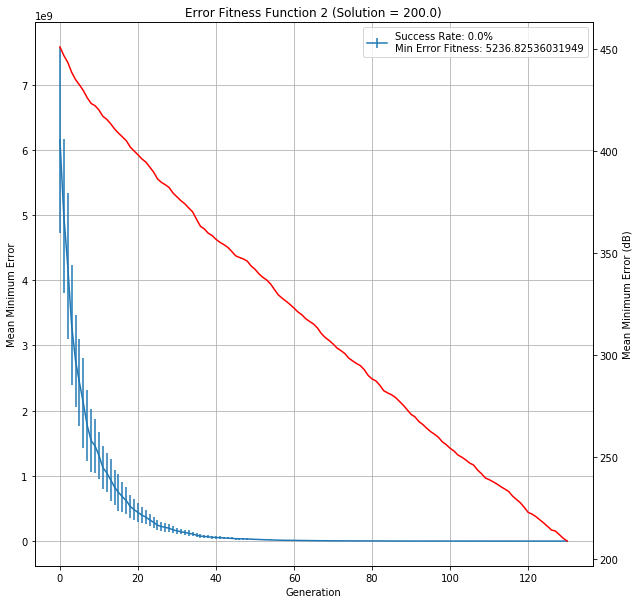

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[2_10_51_300_0.4_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,2,10,0.4,27554.614611,56567.73718,67386.281532,43384.28712,36294.167332,22296.827367,...,29267.691109,71270.212048,23458.175818,25517.031615,10449.519925,69825.842378,39488.355179,34519.990387,3:14:46,39900
